<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/GMM_EM_in_DataFrame_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')

In [ ]:
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal


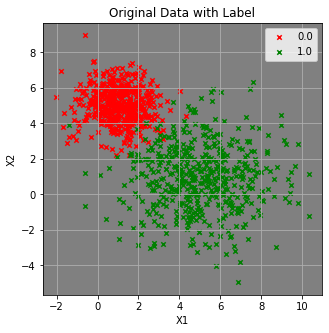

In [ ]:
# X1, y1 = make_blobs(centers= [(1,5)], random_state=1, n_samples=5000, cluster_std=[1.5])
# X2, y2 = make_blobs(centers= [(5,1)], random_state=10, n_samples=15000, cluster_std=[1])

X1, y1 = make_blobs(centers= [(1,5)], random_state=1, n_samples=500, cluster_std=[1.])
X2, y2 = make_blobs(centers= [(5,1)], random_state=10, n_samples=500, cluster_std=[2])
X=np.r_[X1, X2]
y=np.r_[y1, y2+1]

data=pd.DataFrame(np.c_[X,y], columns=['X1','X2','label'])
fig, axis=plt.subplots(figsize=(5,5))
axis.set_facecolor('grey')
grouped=data.groupby('label')
for key, group in grouped:
      colors = {0:'red', 1:'green',2:'blue',3:'yellow'}
      _=group.plot(ax=axis, kind='scatter', x='X1', y='X2', marker='x', label=key, color=colors[key], grid=True, title='Original Data with Label')
# fig, axis1=plt.subplots(figsize=(5,5))
# data['label'].hist(ax=axis1)

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
labels = gmm.fit(X).predict(X)
print('BIC value  @', ':: ',np.round(gmm.bic(X),8))
print('LogLL value  @', ':: ',np.round(-2*gmm.score(X)*X.shape[0],8))
print('centers @ :: ',np.round(gmm.means_,8))
print('covariances @ :: ', np.round(gmm.covariances_,8))
print('weights @ :: ', np.round(gmm.weights_,8))


BIC value  @ ::  8269.78673236
LogLL value  @ ::  8193.80142429
centers @ ::  [[4.96 0.986]
 [1.04 5.04]]
covariances @ ::  [[[3.73 -0.0827]
  [-0.0827 3.52]]

 [[0.948 -0.08]
  [-0.08 0.974]]]
weights @ ::  [0.506 0.494]


In [ ]:
print('LogLL value  @', ':: ',np.round(-2*gmm.score(X)*X.shape[0]+11*np.log(X.shape[0]) - gmm.bic(X),8))

LogLL value  @ ::  0.0


In [ ]:
data['labels_mod']=labels
data

,X1,X2,label,labels_mod
0,-0.045534,5.355285,0.0,1
1,1.840862,4.897113,0.0,1
2,0.524627,5.477610,0.0,1
3,1.986335,5.213534,0.0,1
4,0.191153,5.557439,0.0,1
...,...,...,...,...
995,5.938992,2.551308,1.0,0
996,4.777839,0.922238,1.0,0
997,7.090339,0.840130,1.0,0
998,9.483733,0.507026,1.0,0


In [ ]:
pdf0=multivariate_normal.pdf(X, mean=gmm.means_[0], cov=gmm.covariances_[0])
pdf1=multivariate_normal.pdf(X, mean=gmm.means_[1], cov=gmm.covariances_[1])

data['ll']=np.log(gmm.weights_[0]*pdf0+gmm.weights_[1]*pdf1)

-2*data['ll'].sum()

8193.801424294901

In [ ]:
###initial values for label
np.random.seed=123400
data['new_label']=np.random.choice([0,1], size=data.shape[0])

mean0=np.array([2,2])
mean1=np.array([3,4])

cov0=np.array([[2,0],
              [0,2]])
cov1=np.array([[1,0],
              [0,1]])

# mean0=gmm.means_[0]
# cov0=gmm.covariances_[0]
# mean1=gmm.means_[1]
# cov1=gmm.covariances_[1]

In [ ]:
##needs to improve upon simple mean and covariance estimation.

ll_mod0=-np.inf

for i in range(200):
  pdf0=multivariate_normal.pdf(X, mean=mean0, cov=cov0)
  pdf1=multivariate_normal.pdf(X, mean=mean1, cov=cov1)

  LL0=np.log(pdf0) 
  LL1=np.log(pdf1)

  data['new_labels']=(LL1>LL0).astype(int)
  data['LL0']=LL0
  data['LL1']=LL1

  w0=data.loc[data.new_labels==0]['X1'].count()/X.shape[0]
  w1=data.loc[data.new_labels==1]['X1'].count()/X.shape[0]
  # data['ll_mod']=np.log(data['w0']*pdf0+data['w1']*pdf1)
  data['ll_mod']=np.log(w0*pdf0+w1*pdf1)
  ll_mod1 = data['ll_mod'].sum()
  if ll_mod0 < ll_mod1:
    ll_mod0 = ll_mod1
  else:
    break
  
  print(i,') ',-2*(ll_mod1))

  ##update means, covarances
  # cov1=data.loc[data['new_labels']==1][['X1','X2']].cov().values
  # cov0=data.loc[data['new_labels']==0][['X1','X2']].cov().values 
  cov1=data.loc[data['new_labels']==1][['X1','X2']].cov().values * (data.loc[data.new_labels==1]['X1'].count() -1)/data.loc[data.new_labels==1]['X1'].count()
  cov0=data.loc[data['new_labels']==0][['X1','X2']].cov().values * (data.loc[data.new_labels==0]['X1'].count() -1)/data.loc[data.new_labels==0]['X1'].count()
  mean1=data.loc[data['new_labels']==1][['X1','X2']].mean().values
  mean0=data.loc[data['new_labels']==0][['X1','X2']].mean().values

np.set_printoptions(precision=8)
print('\n'*3,'parameters::')
print(mean0)
print(mean1)
print(cov0)
print(cov1)
print(w0, w1)

0 )  12265.023942652631
1 )  8619.53988464526
2 )  8301.79059951789
3 )  8206.880700385645
4 )  8197.607953416944
5 )  8196.664106247044



 parameters::
[4.99533519 0.94906462]
[1.02752037 5.04826656]
[[3.59505376 0.0623828 ]
 [0.0623828  3.38326217]]
[[ 0.92963962 -0.04188551]
 [-0.04188551  0.92294174]]
0.502 0.498


In [ ]:
# a=np.array([[1,2], [3,4]])
print(np.log(np.abs(np.linalg.det(cov0))))
print(np.log(np.abs(np.linalg.det(cov1))))
# print(np.linalg.det(a))

2.498079322801183
-0.155194276809177


In [ ]:
iv0 = np.linalg.inv(cov0)
iv1 = np.linalg.inv(cov1)
# iv2 = np.linalg.inv(cov2)
X_DMEAN0 = X - mean0
left_term0 = np.dot(X_DMEAN0, iv0)
MDsq0 = np.diag(np.dot(left_term0, X_DMEAN0.T))
# Y0 = -0.5 *( MDsq0 + 4*log2pi + logdet0 )
Y0 = -0.5 *( MDsq0 + 2*np.log(2*np.pi) + np.log(np.abs(np.linalg.det(cov0))) )


X_DMEAN1 = X - mean1
left_term1 = np.dot(X_DMEAN1, iv1)
MDsq1 = np.diag(np.dot(left_term1, X_DMEAN1.T))
# Y1 = -0.5 *( MDsq1 + 4*log2pi + logdet1 )
Y1 = -0.5 *( MDsq1 + 2*np.log(2*np.pi) + np.log(np.abs(np.linalg.det(cov1))) )

# X_DMEAN2 = X - mean2
# left_term2 = np.dot(X_DMEAN2, iv2)
# MDsq2 = np.diag(np.dot(left_term2, X_DMEAN2.T))
# Y2 = -0.5 *( MDsq2 + 4*np.log(2*np.pi) + logdet2 )

data['MDsq0']=MDsq0
data['MDsq1']=MDsq1

data['Y0']=Y0
data['Y1']=Y1

In [ ]:
data

,X1,X2,label,labels_mod,ll,new_label,new_labels,LL0,LL1,ll_mod,MDsq0,MDsq1,Y0,Y1
0,-0.045534,5.355285,0.0,1,-3.142606,1,1,-9.606233,-2.415900,-3.112295,13.038633,1.311240,-9.606233,-2.415900
1,1.840862,4.897113,0.0,1,-2.831680,1,1,-6.839495,-2.123194,-2.811369,7.505156,0.725828,-6.839495,-2.123194
2,0.524627,5.477610,0.0,1,-2.718582,0,1,-9.003234,-1.986086,-2.682338,11.832634,0.451612,-9.003234,-1.986086
3,1.986335,5.213534,0.0,1,-2.998725,0,1,-7.100853,-2.278325,-2.967401,8.027873,1.036089,-7.100853,-2.278325
4,0.191153,5.557439,0.0,1,-2.980067,1,1,-9.551082,-2.257185,-2.953655,12.928330,0.993810,-9.551082,-2.257185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.938992,2.551308,1.0,0,-4.291053,1,0,-3.582565,-17.545695,-4.271719,0.991296,31.570831,-3.582565,-17.545695
996,4.777839,0.922238,1.0,0,-3.809943,1,0,-3.093574,-17.825178,-3.782729,0.013315,32.129795,-3.093574,-17.825178
997,7.090339,0.840130,1.0,0,-4.414219,1,0,-3.700465,-29.935771,-4.389620,1.227097,56.350983,-3.700465,-29.935771
998,9.483733,0.507026,1.0,0,-6.569465,1,0,-5.928745,-49.615629,-6.617900,5.683656,95.710698,-5.928745,-49.615629


In [ ]:
data.LL0.sum()

-6086.780317825007

In [ ]:
data.LL1.sum()

-12613.214835523488

In [ ]:
data


,X1,X2,label,labels_mod,ll,new_label,new_labels,LL0,LL1,ll_mod
0,-0.045534,5.355285,0.0,0,-3.142606,0,1,-9.606233,-2.415900,-3.112295
1,1.840862,4.897113,0.0,0,-2.831680,0,1,-6.839495,-2.123194,-2.811369
2,0.524627,5.477610,0.0,0,-2.718582,0,1,-9.003234,-1.986086,-2.682338
3,1.986335,5.213534,0.0,0,-2.998725,0,1,-7.100853,-2.278325,-2.967401
4,0.191153,5.557439,0.0,0,-2.980067,1,1,-9.551082,-2.257185,-2.953655
...,...,...,...,...,...,...,...,...,...,...
995,5.938992,2.551308,1.0,1,-4.291053,0,0,-3.582565,-17.545695,-4.271719
996,4.777839,0.922238,1.0,1,-3.809943,0,0,-3.093574,-17.825178,-3.782729
997,7.090339,0.840130,1.0,1,-4.414219,1,0,-3.700465,-29.935771,-4.389620
998,9.483733,0.507026,1.0,1,-6.569465,1,0,-5.928745,-49.615629,-6.617900


In [ ]:
# data.to_csv('/content/to_sas.csv')

In [ ]:
# from google.colab import files
# files.download('/content/to_sas.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbba12f1d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fcbb70635d0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbb7016c50>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fcbb6fd7310>]], dtype=object)

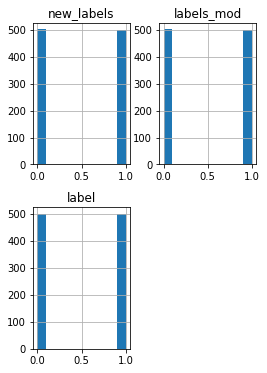

In [ ]:
data[['new_labels', 'labels_mod','label']].hist(figsize=(4,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbb6f3bb10>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fcbb6ef5950>]], dtype=object)

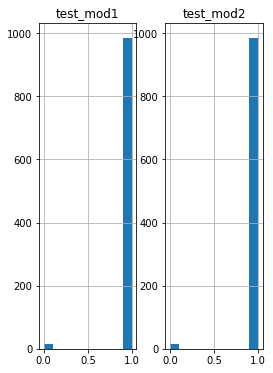

In [ ]:
data['test_mod1']=(np.abs(data.label-data.labels_mod)==1.).astype(int)
data['test_mod2']=(np.abs(data.label-data.new_labels)==1.).astype(int)

data[['test_mod1', 'test_mod2']].hist(figsize=(4,6))

In [ ]:
data[['test_mod1', 'test_mod2']].describe()

,test_mod1,test_mod2
count,1000.000000,1000.000000
mean,0.984000,0.984000
std,0.125538,0.125538
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/k_medoids_clustering.ipynb')
files.download('/content/drive/MyDrive/Colab Notebooks/Pyspark in Colab.ipynb')
files.download('/content/drive/MyDrive/Colab Notebooks/pyclustering clarans.ipynb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls -lt '/content/drive/MyDrive/Colab Notebooks/'

total 172676
-rw------- 1 root root   82661 Aug  2 16:15 'GMM - EM in DataFrame-2d.ipynb'
-rw------- 1 root root   65559 Aug  2 13:42  k_medoids_clustering.ipynb
-rw------- 1 root root   83179 Aug  2 13:30 'Copy of GMM - EM in DataFrame-2d.ipynb'
-rw------- 1 root root   20299 Aug  2 13:25 'Pyspark in Colab.ipynb'
-rw------- 1 root root 1300069 Aug  1 15:43  agglomerative_clustering.ipynb
-rw------- 1 root root   20307 Aug  1 04:15  gower-distance-simple-way-with-one-hot-encode.ipynb
-rw------- 1 root root  613713 Aug  1 04:06  mean-shift-presentation.ipynb
-rw------- 1 root root  268246 Aug  1 03:11 'GMM - EM in DataFrame 2D example.ipynb'
-rw------- 1 root root  240481 Jul 31 20:07 'GMM - EM in DataFrame.ipynb'
-rw------- 1 root root   74290 Jul 31 02:56 'pyclustering clarans.ipynb'
-rw------- 1 root root   17969 Jul 30 16:41  colab_basic_resource_check.ipynb
-rw------- 1 root root  416977 Jul 29 19:58 'Risk of Memory Error when using Birch clustering algorithm.ipynb'
-rw------- 1 ro

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>